# Econometric 322 Lab \#7: Self-Identified Problem

# <font color = red> Collaboration Policy </font>

The submitted assignmenst must be your work.  There is to be no collaboration.

# <font color = red> Purpose </font>

The purpose of this lab is to allow you to:

1. identify and define your own economic problem;

2. collect your own data;

3. analyze your data using the tools you learned;

4. estimate a multiple linear regression model in Pandas;

5. interpret key statistics;

6. identify shortcomings in the proposed linear model;

5. summarize the regression output;

6. estimate elasticities and judge their reasonableness;

7. build a model portfolio;

8. interpret the model results.

# <font color = red> Problem Statement</font> 

Productivity is one of the most important factors determining living standards. Weak productivity growth, however, has been endemic to the developed world as of late, with some economists, like Larry Summers, worrying we have entered "secular stagnation", a state of persistent low demand and mediocre growth, and some economists, like Robert Gordon, worrying we have simply run out of innovations. Nonetheless, there is still a degree of variety amongst countries in their annual productivity growth. In this lab, the goal is to construct a model and see what factors explain this variation.

# <font color = red> Documentation </font>

Provide the appropriate documentation.

## <font color = blue> Abstract </font>
*In this lab, we looked at the relationship between Labor Productivity Growth and Investment, R&D Spending, Tertiary Education, Government Tax Revenue, Legal Systems and Foreign-Born Population. We could not conclusively determine whether any of these factors affected Labor Productivity. Further analysis may be required, and other factors should be explored.*

## <font color = blue> Data Dictionary </font>

| Variable | Values   | Source | Mnemonic |
|----------|----------|--------|---------|
| Population with Tertiary Education | 25-34 year-olds, % in same age group, 2010 | OECD Education at a glance: Educational attainment and labour-force status | tert |
| Gross domestic spending on R&D | Total, % of GDP, 2010 | OECD Science, Technology and R&D Statistics: Main Science and Technology Indicators | rad |
| Tax revenue | Total, % of GDP, 2010 | OECD Revenue Statistics: Comparative table | tax |
| Investment (Gross fixed capital formation) | Total, Annual growth rate (%), 2010 | OECD Aggregate National Accounts, SNA 2008 (or SNA 1993): Gross domestic product | inv |
| Foreign-born population | Total, % of population, 2010 | OECD International Migration Statistics: International migration database | fbp |
| Legal System | Based on English Common Law, or Civil Law | List of national legal systems, Wikipedia | law (1=common, 0=civil) |
| Labor Productivity Growth | Labour productivity, Annual growth rate (%), 2010 | OECD Productivity Statistics: GDP per capita and productivity growth | pro |

# <font color = red> Pre-lab </font>

Data description, testable hypotheses, statistical hypotheses.

## <font color = blue> What type of data is this and why (i.e., source and domain)? </font>

This is cross-sectional data, because we're comparing a bunch of different countries in 2010. Since this is OECD data, it primarily focuses on developed countries, which is our focus. It is secondary data, because all of it has been compiled from the OECD or Wikipedia.

## <font color = blue> What are good testable hypothesis?  Explain your testable hypotheses. </font>

As population with tertiary education increases, productivity growth should increase, as educated people should be more innovative and think of ways to improve productivity at a greater rate. As Gross domestic spending on R&D increases, productivity growth should also increase, as the spending on Research and Development should translate into new inventions and ideas that increase productivity. As Tax revenue as a share of GDP increases, productivity growth should decrease, because a greater tax burden shifts resources from the private sector to the inefficient, bureaucratic public sector. As Investment growth rate increases, productivity growth should increase, as workers with more capital should be more productive. As Foreign-born population increases, productivity growth should increase, as new immigrants should presumably have skills and knowledge that are scarce in their new country. Legal systems based on Common Law should be expected to have higher productivity growth, as they better protect investors, thus providing better incentives for people and investors to take risks and invest in more unconventional but innovative ventures.

## <font color = blue> Write a tentative <u>specific</u> model.  Explain your model.  </font>

*pro=$\beta_0$+$\beta_1$tert+$\beta_2$rad+$\beta_3$tax+$\beta_4$inv+$\beta_5$fbp+$\beta_6$law+$\epsilon$* <br>
Tertiary Education, R&D Spending, Investment and Foreign-Born Population should be positively correlated with productivity, for reasons discussed prior. Tax revenue as a share of GDP should be negatively correlated with productivity. The coefficient on the dummy variable for Legal System should also be positive, reflecting how legal systems based on common law should have higher productivity growth than those based on civil law.

## <font color = blue> Write the statistical hypotheses to go along with your testable hypothesis.  Explain what you wrote.</font>

$H_O$ = Null Hypothesis: The Hypothesis that none of the Explanatory Variables influence Productivity Growth <br>
$H_A$ = Alternative Hypothesis: The Hypothesis that at least one Explanatory Variable influences  Productivity Growth<br>
$H_O: \beta_1 = \beta_2 = \beta_3 =\beta_4 = \beta_5 = \beta_6 = 0$

$H_A$: At least one $\beta_i  \neq 0$ 

# <font color = red> Tasks </font>

Data import, data examination, model estimation, elasticity calculations, portfolio construction.  Be sure to include all you learned this semester.

In [123]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.api import anova_lm
import statsmodels.stats.stattools as smt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip

In [124]:

df=pd.merge(pd.read_csv("fbp.csv",index_col="LOCATION"),pd.read_csv("law.csv",index_col="LOCATION"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("inv.csv",index_col="LOCATION"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("tert.csv",index_col="LOCATION"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("rad.csv",index_col="LOCATION"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("tax.csv",index_col="LOCATION"),left_index=True,right_index=True)
df=pd.merge(df,pd.read_csv("pro.csv",index_col="LOCATION"),left_index=True,right_index=True)
df.head(5)

,fbp,law,inv,tert,rad,tax,pro
LOCATION,,,,,,,
AUS,26.696,1,3.552168,44.374836,2.186012,25.311,1.636934
BEL,14.915,0,-0.828960,43.801159,2.050805,42.621,2.239517
CAN,19.860,1,11.510473,56.169838,1.829580,31.080,1.104579
DNK,7.731,0,-5.746984,37.582073,2.917066,44.756,3.913558
FIN,4.627,0,1.096594,39.207012,3.725976,40.788,3.263344


## Scatterplots

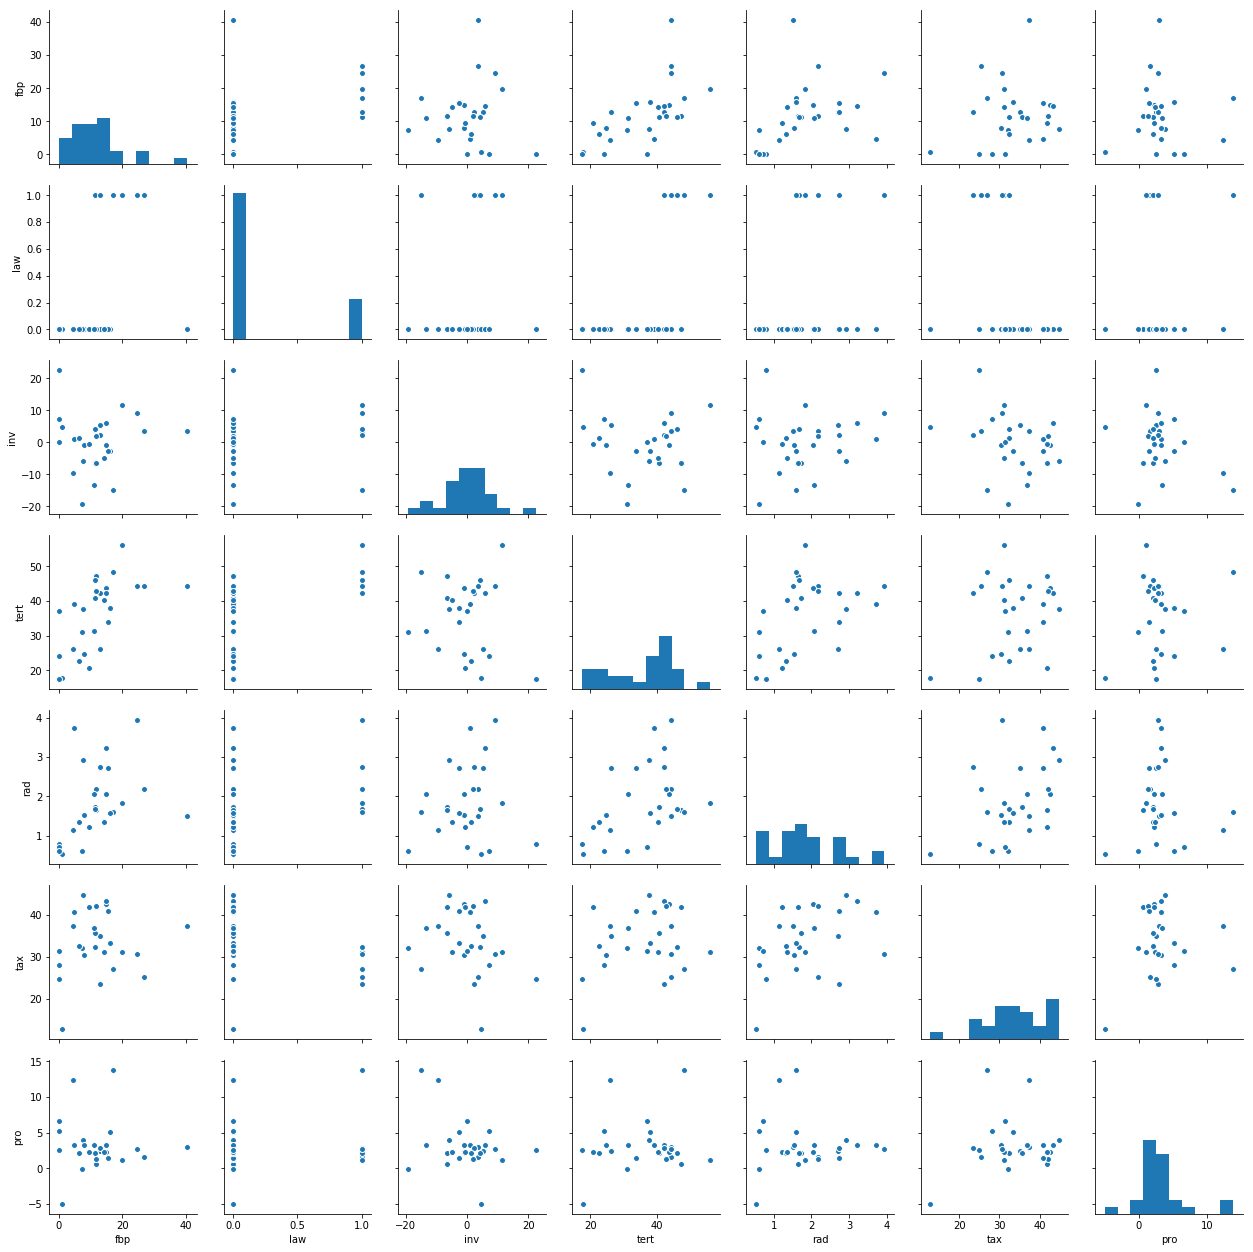

In [125]:
sns.pairplot(df)

[Text(0,0.5,'Labor Productivity Growth'),
 Text(0.5,0,'Tax Revenue as % of GDP'),
 Text(0.5,1,'Taxation vs. Productivity')]

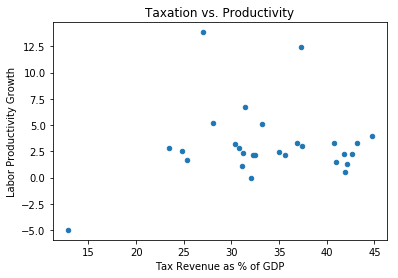

In [126]:
ax = df.plot( x = 'tax', y = 'pro', legend = False, kind = 'scatter' )
ax.set( xlabel = 'Tax Revenue as % of GDP', ylabel = 'Labor Productivity Growth', title = 'Taxation vs. Productivity' )

[Text(0,0.5,'Labor Productivity Growth'),
 Text(0.5,0,'R&D Spending as % of GDP'),
 Text(0.5,1,'R&D vs. Productivity')]

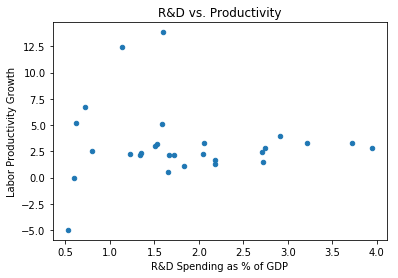

In [127]:
ax = df.plot( x = 'rad', y = 'pro', legend = False, kind = 'scatter' )
ax.set( xlabel = 'R&D Spending as % of GDP', ylabel = 'Labor Productivity Growth', title = 'R&D vs. Productivity' )

[Text(0,0.5,'Tertiary Education'),
 Text(0.5,0,'Percentage of 25-34 Year Olds with Tertiary Education'),
 Text(0.5,1,'Taxation vs. Productivity')]

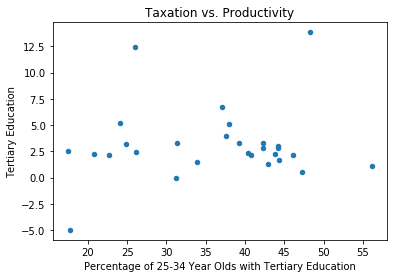

In [128]:
ax = df.plot( x = 'tert', y = 'pro', legend = False, kind = 'scatter' )
ax.set( xlabel = 'Percentage of 25-34 Year Olds with Tertiary Education', ylabel = 'Tertiary Education', title = 'Taxation vs. Productivity' )

[Text(0,0.5,'Labor Productivity Growth'),
 Text(0.5,0,'Annual Growth Rate in Investment'),
 Text(0.5,1,'Investment vs. Productivity')]

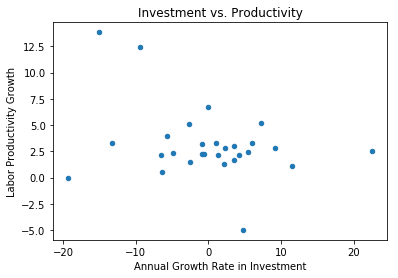

In [129]:
ax = df.plot( x = 'inv', y = 'pro', legend = False, kind = 'scatter' )
ax.set( xlabel = 'Annual Growth Rate in Investment', ylabel = 'Labor Productivity Growth', title = 'Investment vs. Productivity' )

[Text(0,0.5,'Labor Productivity Growth'),
 Text(0.5,0,'Percentage of Population Foreign-Born'),
 Text(0.5,1,'Migration vs. Productivity')]

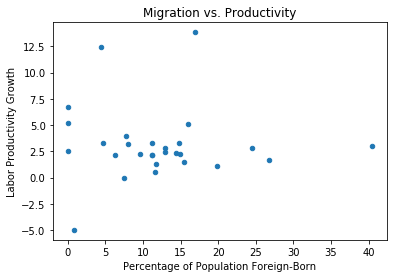

In [130]:
ax = df.plot( x = 'fbp', y = 'pro', legend = False, kind = 'scatter' )
ax.set( xlabel = 'Percentage of Population Foreign-Born', ylabel = 'Labor Productivity Growth', title = 'Migration vs. Productivity' )

## Correlation Matrix

In [131]:
xc=df.corr()
xc

,fbp,law,inv,tert,rad,tax,pro
fbp,1.000000,0.405622,0.026408,0.613951,0.372091,0.149889,-0.019976
law,0.405622,1.000000,0.171069,0.560130,0.276110,-0.398482,0.138528
inv,0.026408,0.171069,1.000000,-0.102175,0.122539,-0.261819,-0.313431
tert,0.613951,0.560130,-0.102175,1.000000,0.436838,0.250037,0.112431
rad,0.372091,0.276110,0.122539,0.436838,1.000000,0.416468,-0.021151
tax,0.149889,-0.398482,-0.261819,0.250037,0.416468,1.000000,0.133658
pro,-0.019976,0.138528,-0.313431,0.112431,-0.021151,0.133658,1.000000


Text(0.5,1,'Heatmap of the Correlation Matrix')

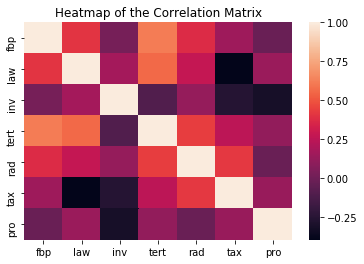

In [132]:
sns.heatmap(xc).set_title( 'Heatmap of the Correlation Matrix' )

## Multicolinearity Test

In [133]:
indepvars = [ 'tax', 'inv', 'tert', 'rad', 'fbp' ]
x = np.diag( np.linalg.inv( xc) ) 
xzip = zip( indepvars, x ) 
lzip( xzip )

[(('tax', 1.6803689748873976),),
 (('inv', 3.579413655357781),),
 (('tert', 1.2963512984738477),),
 (('rad', 2.9184566151072038),),
 (('fbp', 1.8750974988972298),)]

None of the parameters have a VIF > 10, so we do not have to worry about colinearity.

## Constant-Only Model 


In [134]:
formula0 = 'pro ~ 1'
mod0 = smf.ols( formula0, data = df )
reg0 = mod0.fit()
print( reg0.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 11 Dec 2018   Prob (F-statistic):                nan
Time:                        22:00:36   Log-Likelihood:                -73.983
No. Observations:                  28   AIC:                             150.0
Df Residuals:                      27   BIC:                             151.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1547      0.654      4.824      0.0

/Users/jamesbaker/miniconda3/envs/py3k/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


## Unrestricted Model 1

In [135]:
formula1 = 'pro ~ fbp +inv + law +tax+tert+rad'
mod1 = smf.ols( formula1, data = df )
reg1 = mod1.fit()
print( reg1.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.9380
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.489
Time:                        22:00:37   Log-Likelihood:                -70.658
No. Observations:                  28   AIC:                             155.3
Df Residuals:                      21   BIC:                             164.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5356      3.985     -0.134      0.8

### Model 1 Tested Against Restricted Model

In [136]:
hNull2="(inv=0,fbp=0,law=0,tax=0,tert=0,rad=0)"
f_test = reg1.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[0.93801514]]), p=0.4889773133031553, df_denom=21, df_num=6>'

The *p-value* is approximately = .489 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Model 1 Elasticities

In [137]:
par=reg1.params
par

Intercept   -0.535568
fbp         -0.048059
inv         -0.118003
law          4.627241
tax          0.200040
tert        -0.059448
rad         -0.734492
dtype: float64

In [138]:
fbpE=par[1]*(df.fbp.mean()/df.pro.mean())
invE=par[2]*(df.inv.mean()/df.pro.mean())
taxE=par[4]*(df.tax.mean()/df.pro.mean())
tertE=par[5]*(df.tert.mean()/df.pro.mean())
radE=par[6]*(df.rad.mean()/df.pro.mean())
print([fbpE,invE,taxE,tertE,radE])
print([df.fbp.mean(),df.inv.mean(),df.tax.mean(),df.tert.mean(),df.rad.mean()])

[-0.1827317690086353, 0.005071653160794519, 2.1444920640396563, -0.6802137585191748, -0.43116124052935517]
[11.994678571428569, -0.13558375000000034, 33.81892857142857, 36.09609567857142, 1.8518455854285711]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| fbp | reg1 | -0.0481 | 11.9947 | -0.1827 | Inealstic |
| inv | reg1 | -.118 | -0.1356 | 0.0051 | Inelastic |
| tax | reg1 | 0.2 | 33.8189 | 2.1445 | Elastic |
| tert | reg1 | -.0594 | 36.0961 | -0.6802 | Inelastic |
| rad | reg1 | -.7344 | 1.8518 | -0.4311 | Inelastic |

## Shape of Data in Model 1

We will do a Jarque-Bera test statistic to test if the data is normal, as well as see whether the data has any skew 

In [139]:
jb_results = smt.jarque_bera(reg1.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  1.6909308605676971
JB p-value:  0.4293574757268668
JB Skewness:  0.5771949582735814
JB Kurtosis:  3.341691717242693


The *p-value* is >0.05, so we do not reject the Null Hypothesis that the data is normally distributed. The Skewness is approximately = 0.5772, indicating a slight rightward skew. The kurtosis is approximately = 3.3417, which is very close to 3, which would be the the kurtosis if the data was perfectly normal.

## Heteroskedasticity of Model 1

### Tertiary Education

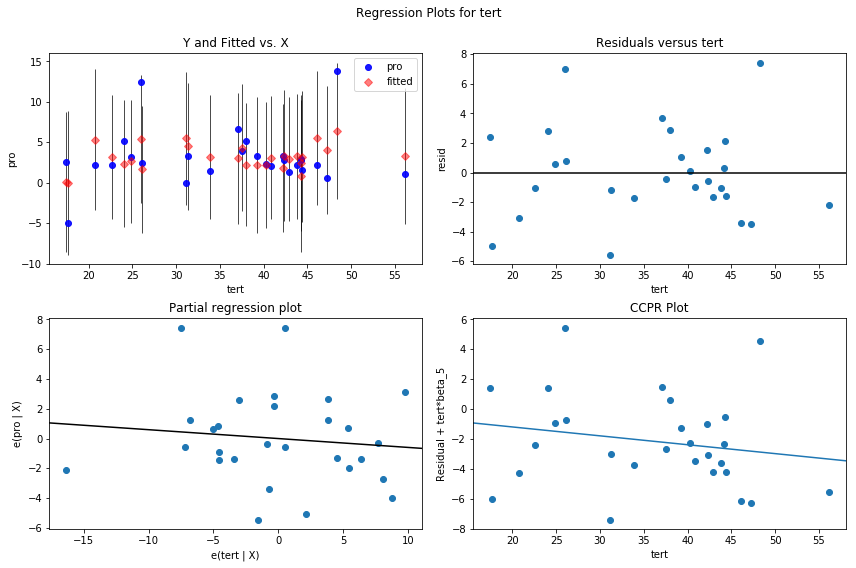

In [140]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg1, "tert", fig=fig)

### Research & Development

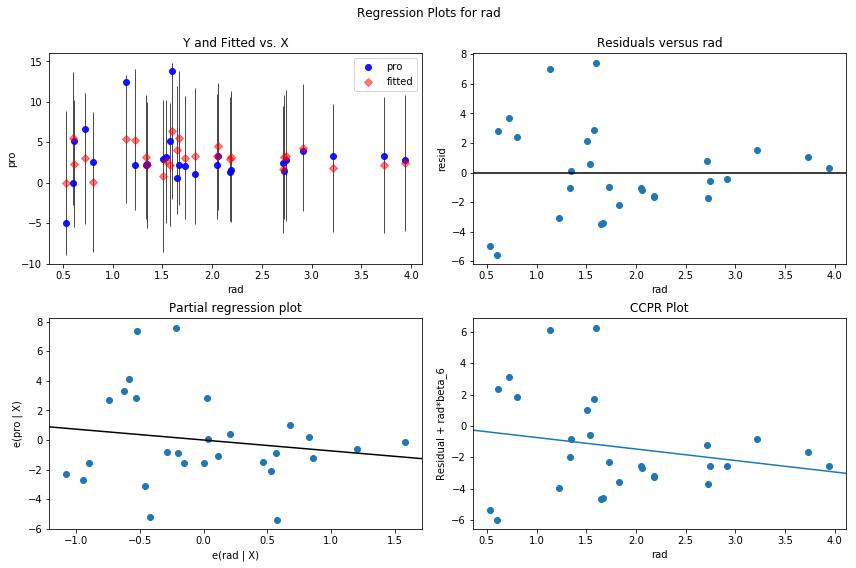

In [141]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg1, "rad", fig=fig)

### Foreign-Born Population

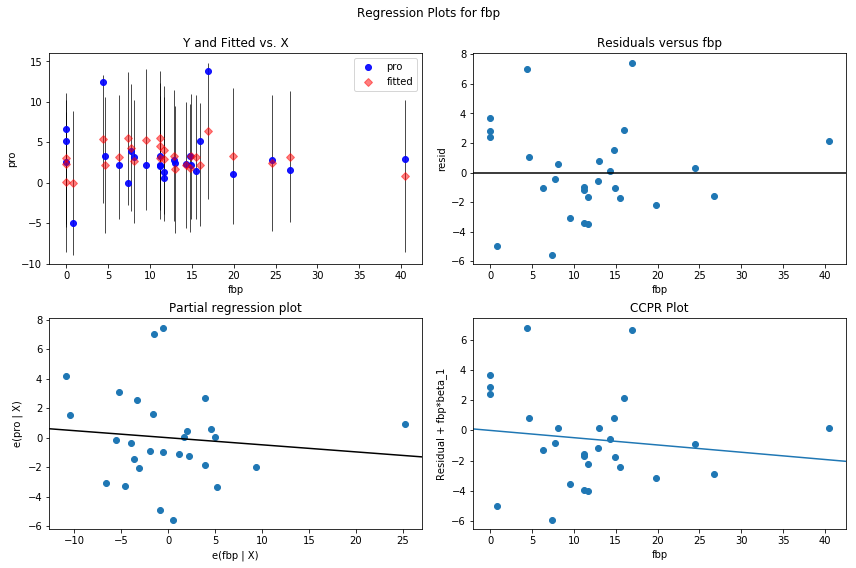

In [142]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg1, "fbp", fig=fig)

### Investment

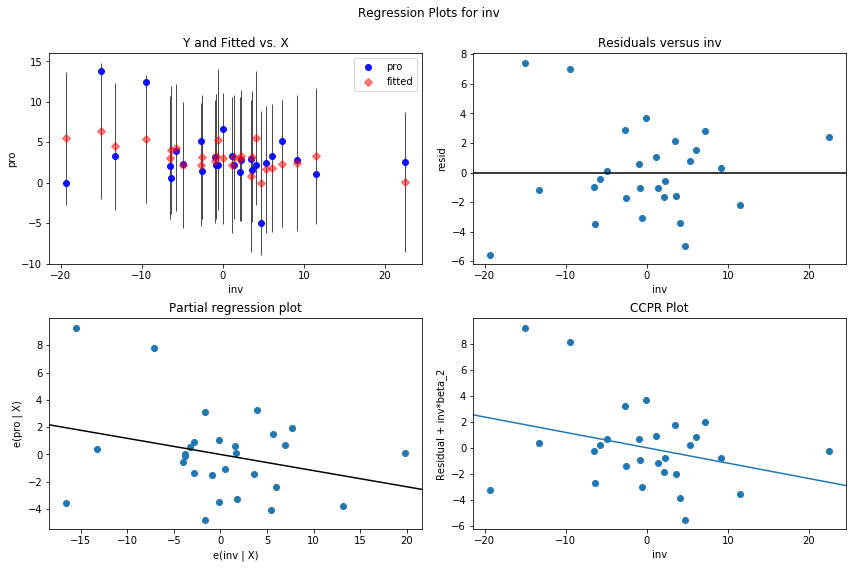

In [143]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg1, "inv", fig=fig)

### Taxation

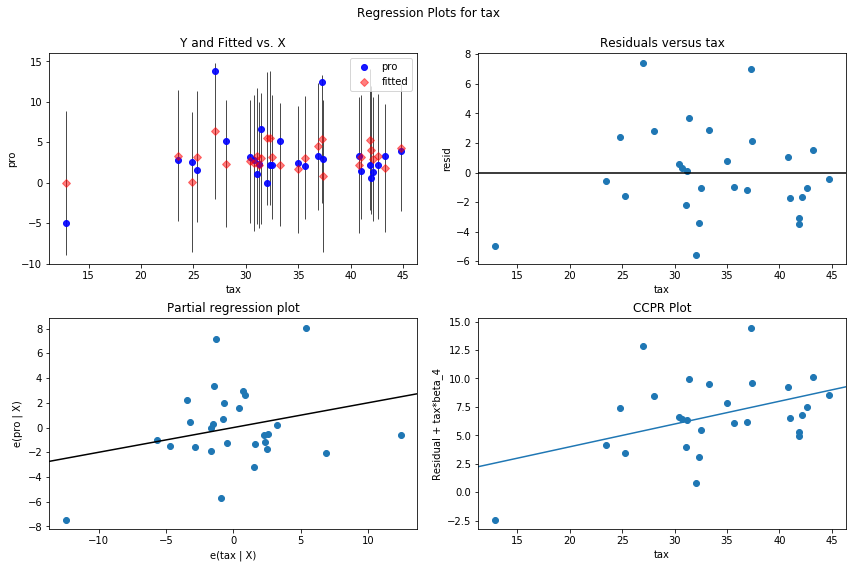

In [144]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg1, "tax", fig=fig)

The residuals seem to get narrower as R&D, as well as Foreign-Born Population increase, according to the graphs. However, appearances can be subjective and decieving, so we must do a White test of Heteroskedasticity.

#### White Test

In [145]:
X = reg1.model.data.orig_exog ##.iloc[ :, 1: ]
print( X.head() )
print( '\n' )
print( reg1.resid.head() )
white = sm.stats.diagnostic.het_white( reg1.resid, X )
ret = [ 'Test Statistic', 'p-Value', 'F Statistic', 'p-Value' ]
xzip1 = zip( ret, white ) 
print( "\nWhite's Test for Heteroskedasticity" )
lzip( xzip1 )

          Intercept     fbp        inv  law     tax       tert       rad
LOCATION                                                                
AUS             1.0  26.696   3.552168  1.0  25.311  44.374836  2.186012
BEL             1.0  14.915  -0.828960  0.0  42.621  43.801159  2.050805
CAN             1.0  19.860  11.510473  1.0  31.080  56.169838  1.829580
DNK             1.0   7.731  -5.746984  0.0  44.756  37.582073  2.917066
FIN             1.0   4.627   1.096594  0.0  40.788  39.207012  3.725976


LOCATION
AUS   -1.572187
BEL   -1.021641
CAN   -2.208607
DNK   -0.433737
FIN    1.058933
dtype: float64

White's Test for Heteroskedasticity


[(('Test Statistic', 27.99085841091699),),
 (('p-Value', 0.3589084144894816),),
 (('F Statistic', 117.76633882436548),),
 (('p-Value', 0.07271378714552798),)]

Our *p-value* > 0.05, so we fail to reject the Null Hypothesis that the data is Homoskedastic.  We will nonetheless try to estimate a model that corrects the standard errors, as under homoscedasticity, the robust standard errors become OLS standard errors.

## Unrestricted Model 2

In [146]:
formula1 = 'pro ~ fbp +inv + law +tax+tert+rad'
reg2 = smf.ols( formula1, data = df ).fit( cov_type = 'HC1' )
print( reg2.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4587
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.831
Time:                        22:01:02   Log-Likelihood:                -70.658
No. Observations:                  28   AIC:                             155.3
Df Residuals:                      21   BIC:                             164.6
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5356      4.925     -0.109      0.9

### Model 2 Tested Against Restricted Model

In [147]:
hNull2="(inv=0,fbp=0,law=0,tax=0,tert=0,rad=0)"
f_test = reg2.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[0.45873031]]), p=0.8307112516575342, df_denom=21, df_num=6>'

The *p-value* is approximately = .8307 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Elasticities of Model 2

In [148]:
par2=reg2.params
par2

Intercept   -0.535568
fbp         -0.048059
inv         -0.118003
law          4.627241
tax          0.200040
tert        -0.059448
rad         -0.734492
dtype: float64

In [149]:
fbpE=par2[1]*(df.fbp.mean()/df.pro.mean())
invE=par2[2]*(df.inv.mean()/df.pro.mean())
taxE=par2[4]*(df.tax.mean()/df.pro.mean())
tertE=par2[5]*(df.tert.mean()/df.pro.mean())
radE=par2[6]*(df.rad.mean()/df.pro.mean())
print([fbpE,invE,taxE,tertE,radE])
print([df.fbp.mean(),df.inv.mean(),df.tax.mean(),df.tert.mean(),df.rad.mean()])

[-0.1827317690086353, 0.005071653160794519, 2.1444920640396563, -0.6802137585191748, -0.43116124052935517]
[11.994678571428569, -0.13558375000000034, 33.81892857142857, 36.09609567857142, 1.8518455854285711]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| fbp | reg2 | -0.0481 | 11.9947 | -0.1827 | Inealstic |
| inv | reg2 | -.118 | -0.1356 | 0.0051 | Inelastic |
| tax | reg2 | 0.2 | 33.8189 | 2.1445 | Elastic |
| tert | reg2 | -.0594 | 36.0961 | -0.6802 | Inelastic |
| rad | reg2 | -.7344 | 1.8518 | -0.4311 | Inelastic |

## Shape of Data in Model 2

We will do a Jarque-Bera test statistic to test if the data is normal, as well as see whether the data has any skew 

In [150]:
jb_results = smt.jarque_bera(reg2.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  1.6909308605676971
JB p-value:  0.4293574757268668
JB Skewness:  0.5771949582735814
JB Kurtosis:  3.341691717242693


The results are the same as in the prior JB Test, so fail to reject the Null Hypothesis that the data is normal.

We will estimate a different model by removing some of the parameters. Foreign-Born Population and Tertiary Education have the highest p-values in both unrestricted models examined so far, so we will remove them.

## Unrestricted Model 3

In [151]:
formula3 = 'pro ~inv+ tax+law+ rad'
mod3 = smf.ols( formula3, data = df )
reg3 = mod3.fit()
print( reg3.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.252
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.317
Time:                        22:01:11   Log-Likelihood:                -71.225
No. Observations:                  28   AIC:                             152.5
Df Residuals:                      23   BIC:                             159.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7016      3.766     -0.186      0.8

### Model 3 Tested Against Restricted Model

In [152]:
hNull2="(inv=0,law=0,tax=0,rad=0)"
f_test = reg3.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[1.25156695]]), p=0.31735368440708783, df_denom=23, df_num=4>'

The *p-value* is approximately = .317 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Elasticities of Model 3

In [153]:
par3=reg3.params
par3

Intercept   -0.701599
inv         -0.111363
tax          0.137969
law          2.975654
rad         -0.789728
dtype: float64

In [154]:
invE=par3[1]*(df.inv.mean()/df.pro.mean())
taxE=par3[2]*(df.tax.mean()/df.pro.mean())
radE=par3[4]*(df.rad.mean()/df.pro.mean())
print([invE,taxE,radE])
print([df.inv.mean(),df.tax.mean(),df.rad.mean()])

[0.004786266580498589, 1.479073916430492, -0.46358589723758326]
[-0.13558375000000034, 33.81892857142857, 1.8518455854285711]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| inv | reg3 | -.1114 | -0.1356 | 0.0048 | Inelastic |
| tax | reg3 | 0.138 | 33.8189 | 1.4791 | Elastic |
| rad | reg3 | -.7897 | 1.8518 | -0.4636 | Inelastic |

## Shape of Data in Model 3

In [155]:
jb_results = smt.jarque_bera(reg3.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  2.8641927439928643
JB p-value:  0.23880776720789657
JB Skewness:  0.7171237652664699
JB Kurtosis:  3.63083783427601


Given a *p-value* >.05, we fail to reject the Null Hypothesis that the data is normally distributed. The skewness is approximately = .7171, indicating a light rightward skew, and kurtosis is approximately = 3.6308, which is very close to 3, the kurtosis of a normal distribution.

## Heteroscedasticity of Model 3

### Research and Development

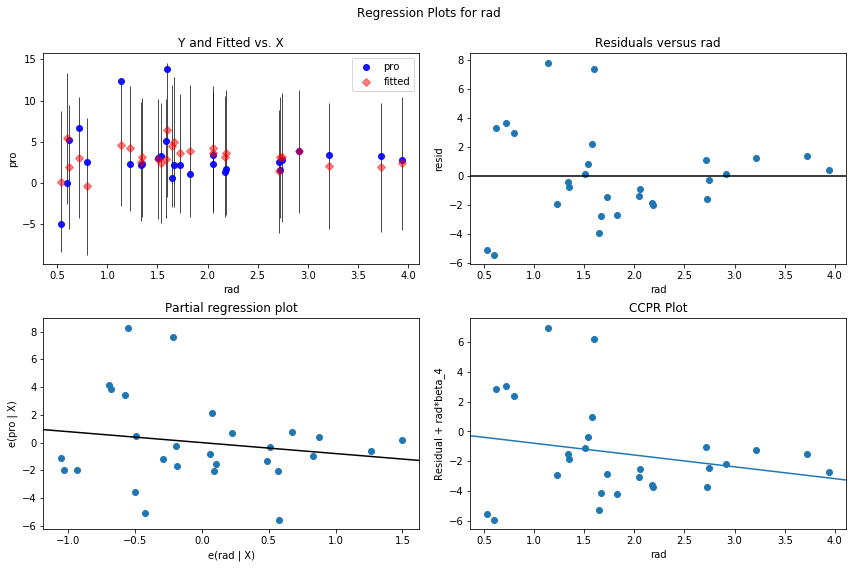

In [156]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg3, "rad", fig=fig)

### Investment

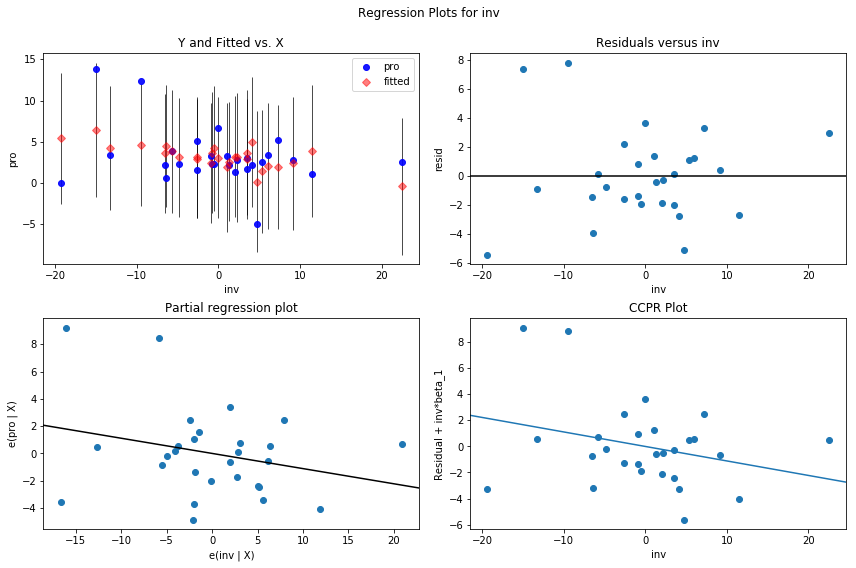

In [157]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg3, "inv", fig=fig)

### Taxation

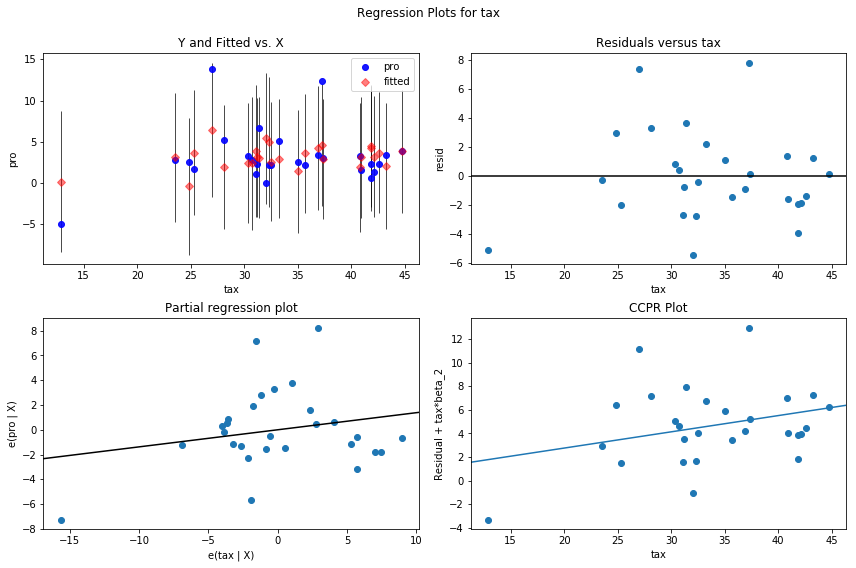

In [158]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg3, "tax", fig=fig)

The Residual seems to get smaller as R&D increases. We must do a White test.

In [159]:
X = reg3.model.data.orig_exog ##.iloc[ :, 1: ]
print( X.head() )
print( '\n' )
print( reg3.resid.head() )
white = sm.stats.diagnostic.het_white( reg3.resid, X )
ret = [ 'Test Statistic', 'p-Value', 'F Statistic', 'p-Value' ]
xzip3 = zip( ret, white ) 
print( "\nWhite's Test for Heteroskedasticity" )
lzip( xzip3 )

          Intercept        inv     tax  law       rad
LOCATION                                             
AUS             1.0   3.552168  25.311  1.0  2.186012
BEL             1.0  -0.828960  42.621  0.0  2.050805
CAN             1.0  11.510473  31.080  1.0  1.829580
DNK             1.0  -5.746984  44.756  0.0  2.917066
FIN             1.0   1.096594  40.788  0.0  3.725976


LOCATION
AUS   -2.007325
BEL   -1.412007
CAN   -2.730847
DNK    0.103894
FIN    1.402083
dtype: float64

White's Test for Heteroskedasticity


[(('Test Statistic', 20.501086260602545),),
 (('p-Value', 0.08340089951111535),),
 (('F Statistic', 2.944172137897869),),
 (('p-Value', 0.027352880469653146),)]

Our *p-value* > 0.05, so we fail to reject the Null Hypothesis that the data is Homoskedastic.  We will nonetheless try to estimate a model that corrects the standard errors, as under homoscedasticity, the robust standard errors become OLS standard errors.

## Unrestricted Model 4

In [160]:
formula3 = 'pro ~inv+ tax+law+ rad'
reg4 = smf.ols( formula3, data = df ).fit( cov_type = 'HC1' )
print( reg4.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                    0.5609
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.693
Time:                        22:01:27   Log-Likelihood:                -71.225
No. Observations:                  28   AIC:                             152.5
Df Residuals:                      23   BIC:                             159.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7016      4.829     -0.145      0.8

### Model 4 Tested Against Restricted Model

In [161]:
hNull2="(inv=0,law=0,tax=0,rad=0)"
f_test = reg4.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[0.56085265]]), p=0.6933504241481696, df_denom=23, df_num=4>'

The *p-value* is approximately = .6934 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Elasticities of Model 4

In [162]:
par4=reg4.params
par4

Intercept   -0.701599
inv         -0.111363
tax          0.137969
law          2.975654
rad         -0.789728
dtype: float64

In [163]:
invE=par4[1]*(df.inv.mean()/df.pro.mean())
taxE=par4[2]*(df.tax.mean()/df.pro.mean())
radE=par4[4]*(df.rad.mean()/df.pro.mean())
print([invE,taxE,radE])
print([df.inv.mean(),df.tax.mean(),df.rad.mean()])

[0.004786266580498589, 1.479073916430492, -0.46358589723758326]
[-0.13558375000000034, 33.81892857142857, 1.8518455854285711]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| inv | reg3 | -.1114 | -0.1356 | 0.0048 | Inelastic |
| tax | reg3 | 0.138 | 33.8189 | 1.4791 | Elastic |
| rad | reg3 | -.7897 | 1.8518 | -0.4636 | Inelastic |

## Shape of Data in Model 4

In [164]:
jb_results = smt.jarque_bera(reg4.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  2.8641927439928643
JB p-value:  0.23880776720789657
JB Skewness:  0.7171237652664699
JB Kurtosis:  3.63083783427601


Given a *p-value* approximately = .2388 >.05, we fail to reject the Null Hypothesis that the data is normally distributed. The skewness is approximately = .7171, indicating a light rightward skew, and kurtosis is approximately = 3.6308, which is very close to 3, the kurtosis of a normal distribution.

## Unrestricted Model 5

In [165]:
formula5 = 'pro ~inv+ law'
mod5 = smf.ols( formula5, data = df )
reg5 = mod5.fit()
print( reg5.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.972
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.160
Time:                        22:01:34   Log-Likelihood:                -71.932
No. Observations:                  28   AIC:                             149.9
Df Residuals:                      25   BIC:                             153.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7841      0.716      3.889      0.0

### Model 5 Tested against Restricted Model

In [166]:
hNull2="(inv=0,law=0)"
f_test = reg5.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[1.97214886]]), p=0.1602184039593733, df_denom=25, df_num=2>'

The *p-value* is approximately = .1602 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Elasticities of Model 5

In [167]:
par5=reg5.params
par5

Intercept    2.784144
inv         -0.141776
law          1.639353
dtype: float64

In [168]:
invE=par5[1]*(df.inv.mean()/df.pro.mean())
print([invE])
print([df.inv.mean()])

[0.006093376871221225]
[-0.13558375000000034]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| inv | reg5 | -.1412 | -0.1356 | 0.0061 | Inelastic |

## Shape of Data in Model 5

In [169]:
jb_results = smt.jarque_bera(reg5.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  3.1122346754791
JB p-value:  0.21095354455348778
JB Skewness:  0.5621947736195195
JB Kurtosis:  4.184642506370094


Given a *p-value* approximately = .211 >.05, we fail to reject the Null Hypothesis that the data is normally distributed. The skewness is approximately = .5622, indicating a light rightward skew, and kurtosis is approximately = 4.1847.

## Heteroscedasticity of Model 5

### Investment

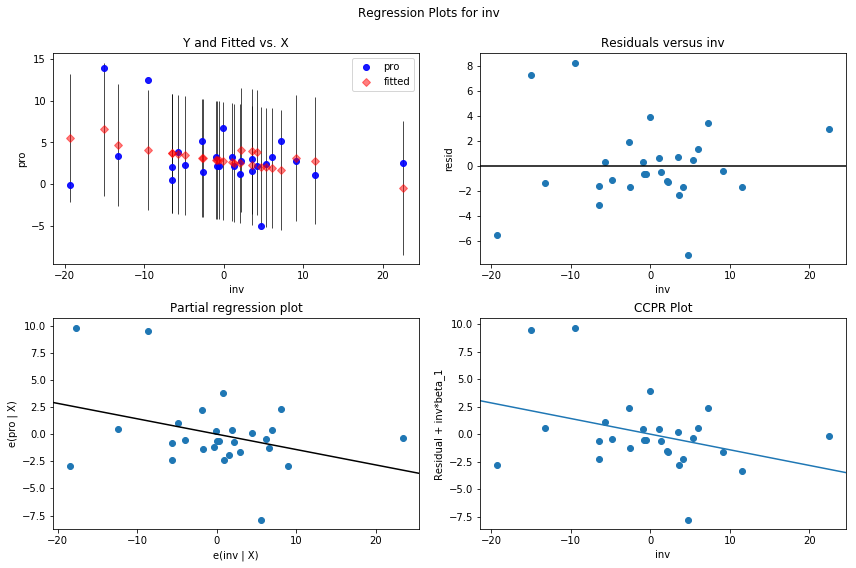

In [170]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg5, "inv", fig=fig)

The Residual seems to get smaller as R&D increases. We must do a White test.

In [171]:
X = reg5.model.data.orig_exog ##.iloc[ :, 1: ]
print( X.head() )
print( '\n' )
print( reg5.resid.head() )
white = sm.stats.diagnostic.het_white( reg5.resid, X )
ret = [ 'Test Statistic', 'p-Value', 'F Statistic', 'p-Value' ]
xzip3 = zip( ret, white ) 
print( "\nWhite's Test for Heteroskedasticity" )
lzip( xzip3 )

          Intercept        inv  law
LOCATION                           
AUS             1.0   3.552168  1.0
BEL             1.0  -0.828960  0.0
CAN             1.0  11.510473  1.0
DNK             1.0  -5.746984  0.0
FIN             1.0   1.096594  0.0


LOCATION
AUS   -2.282951
BEL   -0.662154
CAN   -1.687010
DNK    0.314630
FIN    0.634670
dtype: float64

White's Test for Heteroskedasticity


[(('Test Statistic', 8.572644173848808),),
 (('p-Value', 0.07271559974301907),),
 (('F Statistic', 2.537283222726464),),
 (('p-Value', 0.06755628242373561),)]

Our *p-value* > 0.05, so we fail to reject the Null Hypothesis that the data is Homoskedastic.  We will nonetheless try to estimate a model that corrects the standard errors, as under homoscedasticity, the robust standard errors become OLS standard errors.

## Unrestricted Model 6

In [172]:
formula6 = 'pro ~inv+ law'
mod6 = smf.ols( formula6, data = df )
reg6 = mod6.fit(cov_type='HC1')
print( reg6.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                    0.8170
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.453
Time:                        22:01:46   Log-Likelihood:                -71.932
No. Observations:                  28   AIC:                             149.9
Df Residuals:                      25   BIC:                             153.9
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7841      0.688      4.046      0.0

### Model 6 Tested Against Restricted Model

In [173]:
hNull2="(inv=0,law=0)"
f_test = reg6.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[0.81698111]]), p=0.4532135304063419, df_denom=25, df_num=2>'

The *p-value* is approximately = .4532 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Elasticities of Model 6

In [174]:
par6=reg6.params
par6

Intercept    2.784144
inv         -0.141776
law          1.639353
dtype: float64

In [175]:
invE=par6[1]*(df.inv.mean()/df.pro.mean())
print([invE])
print([df.inv.mean()])

[0.006093376871221225]
[-0.13558375000000034]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| inv | reg6 | -.1412 | -0.1356 | 0.0061 | Inelastic |

## Shape of Data in Model 6

In [176]:
jb_results = smt.jarque_bera(reg6.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  3.1122346754791
JB p-value:  0.21095354455348778
JB Skewness:  0.5621947736195195
JB Kurtosis:  4.184642506370094


Given a *p-value* approximately = .211 >.05, we fail to reject the Null Hypothesis that the data is normally distributed. The skewness is approximately = .5623, indicating a light rightward skew, and kurtosis is approximately = 4.1846

## Unrestricted Model 7

In [177]:
formula7 = 'pro ~ fbp +inv  +tax+tert+rad'
mod7 = smf.ols( formula7, data = df )
reg7 = mod7.fit()
print( reg7.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.5623
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.728
Time:                        22:01:54   Log-Likelihood:                -72.299
No. Observations:                  28   AIC:                             156.6
Df Residuals:                      22   BIC:                             164.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2051      3.974      0.303      0.7

### Model 7 Tested Against Unrestricted Model

In [178]:
hNull2="(inv=0,fbp=0,tax=0,tert=0,rad=0)"
f_test = reg7.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[0.56227741]]), p=0.727739343706013, df_denom=22, df_num=5>'

The *p-value* is approximately = .7277 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Elasticities of Model 7

In [179]:
par7=reg7.params
par7

Intercept    1.205108
fbp         -0.038033
inv         -0.113034
tax          0.025917
tert         0.049336
rad         -0.144129
dtype: float64

In [180]:
fbpE=par7[1]*(df.fbp.mean()/df.pro.mean())
invE=par7[2]*(df.inv.mean()/df.pro.mean())
taxE=par7[3]*(df.tax.mean()/df.pro.mean())
tertE=par7[4]*(df.tert.mean()/df.pro.mean())
radE=par7[5]*(df.rad.mean()/df.pro.mean())
print([fbpE,invE,taxE,tertE,radE])
print([df.fbp.mean(),df.inv.mean(),df.tax.mean(),df.tert.mean(),df.rad.mean()])

[-0.14460814127538466, 0.004858081941742503, 0.27784021821298266, 0.5645072028396911, -0.08460672682316711]
[11.994678571428569, -0.13558375000000034, 33.81892857142857, 36.09609567857142, 1.8518455854285711]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| fbp | reg7 | -0.038 | 11.9947 | -0.1446 | Inealstic |
| inv | reg7 | -.113 | -0.1356 | 0.0049 | Inelastic |
| tax | reg7 | 0.0259 | 33.8189 | 0.2778 | Inelastic |
| tert | reg7 | 0.0493 | 36.0961 | 0.5645 | Inelastic |
| rad | reg7 | -.1441 | 1.8518 | -0.0846 | Inelastic |

## Shape of Data in Model 7

In [181]:
jb_results = smt.jarque_bera(reg7.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  6.354351096823888
JB p-value:  0.04170327782243837
JB Skewness:  0.7886044742578658
JB Kurtosis:  4.7201739990891545


Given a *p-value* approximately = .0417 <.05, we reject the Null Hypothesis that the data is normally distributed. The skewness is approximately = .7886, indicating a rightward skew, and kurtosis is approximately = 4.7202. The data is skewed to the right.

## Heteroscedasticity of Model 7

### Tertiary Education

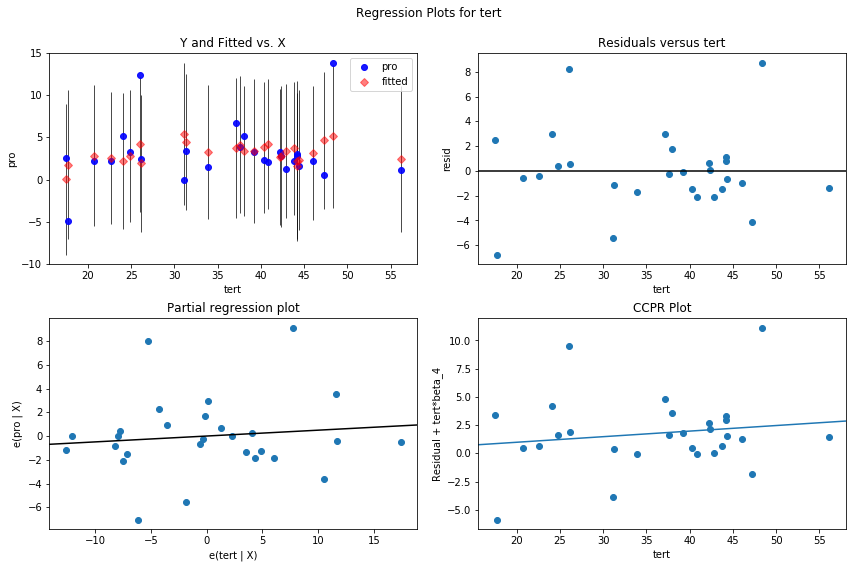

In [182]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg7, "tert", fig=fig)

### Research & Development

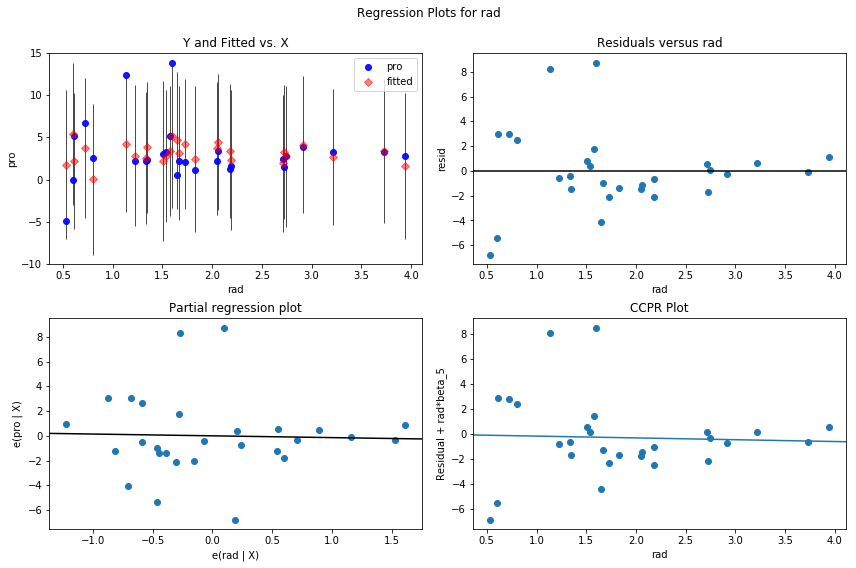

In [183]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg7, "rad", fig=fig)

### Foreign-Born Population

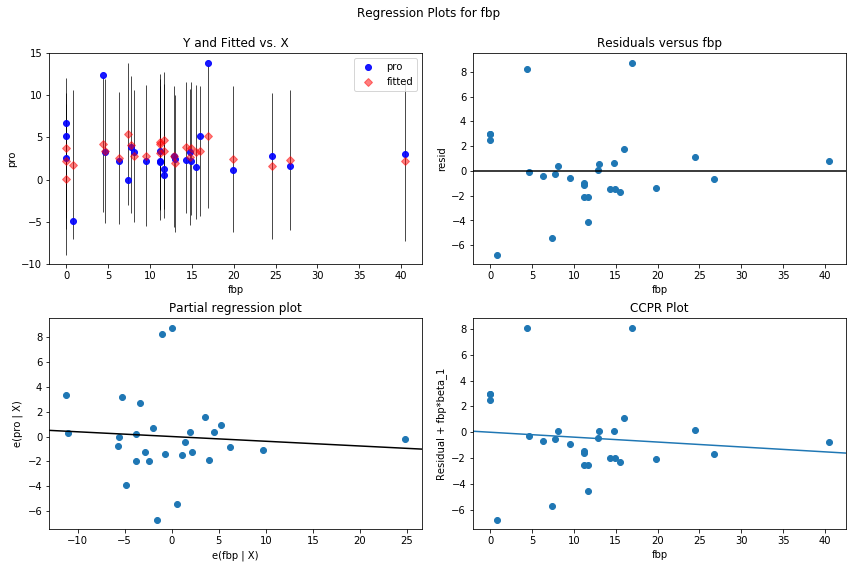

In [184]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg7, "fbp", fig=fig)

### Investment

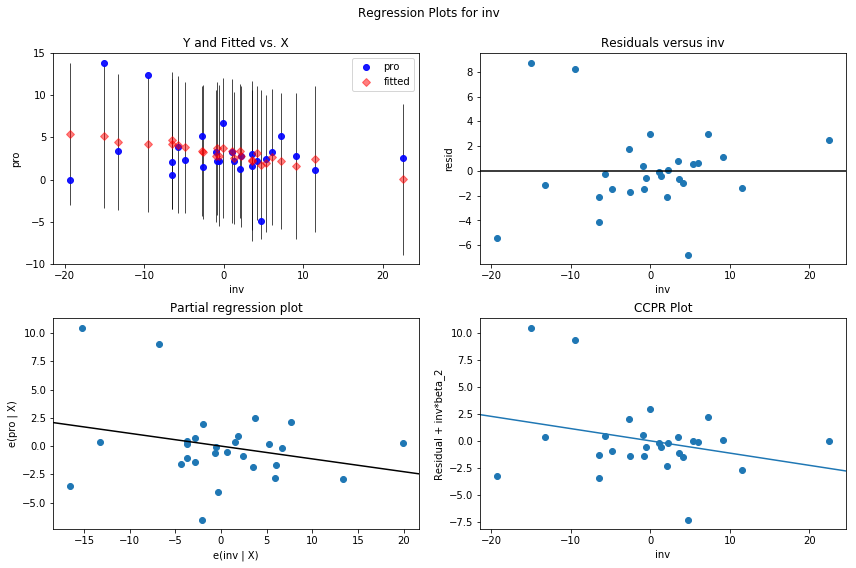

In [185]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg7, "inv", fig=fig)

### Taxation

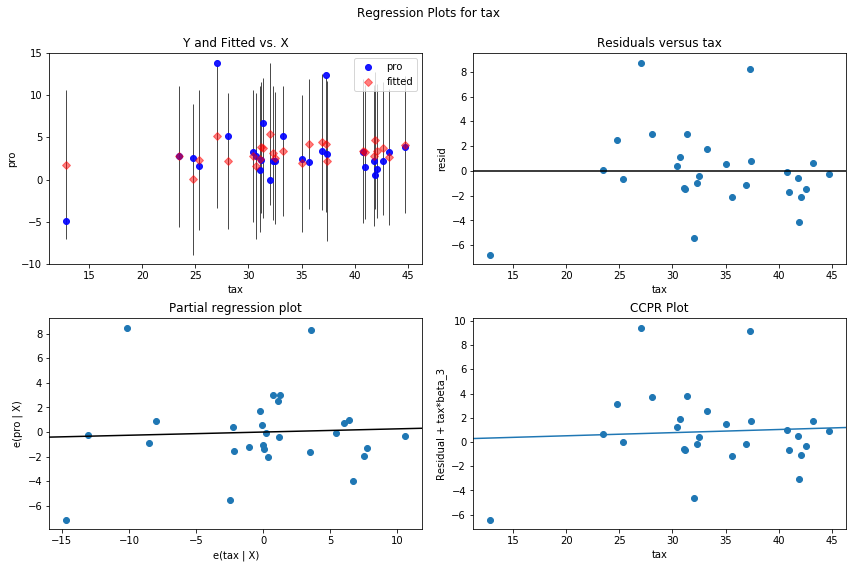

In [186]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg7, "tax", fig=fig)

The residuals seem to get narrower as R&D, Investment and Foreign-Born Population increase, according to the graphs. However, appearances can be subjective and decieving, so we must do a White test of Heteroskedasticity.

#### White Test

In [187]:
X = reg7.model.data.orig_exog ##.iloc[ :, 1: ]
print( X.head() )
print( '\n' )
print( reg7.resid.head() )
white = sm.stats.diagnostic.het_white( reg7.resid, X )
ret = [ 'Test Statistic', 'p-Value', 'F Statistic', 'p-Value' ]
xzip1 = zip( ret, white ) 
print( "\nWhite's Test for Heteroskedasticity" )
lzip( xzip1 )

          Intercept     fbp        inv     tax       tert       rad
LOCATION                                                           
AUS             1.0  26.696   3.552168  25.311  44.374836  2.186012
BEL             1.0  14.915  -0.828960  42.621  43.801159  2.050805
CAN             1.0  19.860  11.510473  31.080  56.169838  1.829580
DNK             1.0   7.731  -5.746984  44.756  37.582073  2.917066
FIN             1.0   4.627   1.096594  40.788  39.207012  3.725976


LOCATION
AUS   -0.681524
BEL   -1.462031
CAN   -1.357114
DNK   -0.240777
FIN   -0.096228
dtype: float64

White's Test for Heteroskedasticity


[(('Test Statistic', 24.639669161965443),),
 (('p-Value', 0.21556558385130908),),
 (('F Statistic', 2.566379509147375),),
 (('p-Value', 0.10257177409121716),)]

Our *p-value* > 0.05, so we fail to reject the Null Hypothesis that the data is Homoskedastic.  We will nonetheless try to estimate a model that corrects the standard errors, as under homoscedasticity, the robust standard errors become OLS standard errors.

## Unrestricted Model 8

In [188]:
formula1 = 'pro ~ fbp +inv  +tax+tert+rad'
reg8 = smf.ols( formula1, data = df ).fit( cov_type = 'HC1' )
print( reg8.summary() )

                            OLS Regression Results                            
Dep. Variable:                    pro   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.6464
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.667
Time:                        22:02:13   Log-Likelihood:                -72.299
No. Observations:                  28   AIC:                             156.6
Df Residuals:                      22   BIC:                             164.6
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2051      5.653      0.213      0.8

### Model 8 Tested Against Restricted Model

In [189]:
hNull2="(inv=0,fbp=0,tax=0,tert=0,rad=0)"
f_test = reg8.f_test( hNull2 )
f_test.summary()

'<F test: F=array([[0.64640198]]), p=0.6670761495768256, df_denom=22, df_num=5>'

The *p-value* is approximately = .6671 >.05, so we fail to reject the Null Hypothesis that all of the betas are 0.

## Elasticities of Model 8

In [190]:
par8=reg8.params
par8

Intercept    1.205108
fbp         -0.038033
inv         -0.113034
tax          0.025917
tert         0.049336
rad         -0.144129
dtype: float64

In [191]:
fbpE=par8[1]*(df.fbp.mean()/df.pro.mean())
invE=par8[2]*(df.inv.mean()/df.pro.mean())
taxE=par8[3]*(df.tax.mean()/df.pro.mean())
tertE=par8[4]*(df.tert.mean()/df.pro.mean())
radE=par8[5]*(df.rad.mean()/df.pro.mean())
print([fbpE,invE,taxE,tertE,radE])
print([df.fbp.mean(),df.inv.mean(),df.tax.mean(),df.tert.mean(),df.rad.mean()])

[-0.14460814127538466, 0.004858081941742503, 0.27784021821298266, 0.5645072028396911, -0.08460672682316711]
[11.994678571428569, -0.13558375000000034, 33.81892857142857, 36.09609567857142, 1.8518455854285711]


| Variable | Model | Estimate | Mean | Elasticity | Interpretation |
|---|---|---|---|---|---|
| fbp | reg2 | -0.038 | 11.9947 | -0.1446 | Inealstic |
| inv | reg2 | -.113 | -0.1356 | 0.0049 | Inelastic |
| tax | reg2 | 0.0259 | 33.8189 | 0.2778 | Elastic |
| tert | reg2 | -.0493 | 36.0961 | 0.5645 | Inelastic |
| rad | reg2 | -.1441 | 1.8518 | -0.0846 | Inelastic |

## Shape of Data in Model 8

We will do a Jarque-Bera test statistic to test if the data is normal, as well as see whether the data has any skew 

In [192]:
jb_results = smt.jarque_bera(reg8.resid)
print( 'JB Value: ', str( jb_results[ 0 ]) )
print( 'JB p-value: ', str( jb_results[ 1 ] ) )
print( 'JB Skewness: ', str( jb_results[ 2 ] ) )
print( 'JB Kurtosis: ', str(  jb_results[ 3 ] ) )

JB Value:  6.354351096823888
JB p-value:  0.04170327782243837
JB Skewness:  0.7886044742578658
JB Kurtosis:  4.7201739990891545


Given a *p-value* approximately = .0417 <.05, we reject the Null Hypothesis that the data is normally distributed. The skewness is approximately = .7886, indicating a rightward skew, and kurtosis is approximately = 4.7202. The data is skewed to the right.

## Model Portfolio

In [193]:
##
## create a variable to hold the model names; this is a list
## 
model_names = [ 'Restricted', 'Model 1','Model 2','Model 3','Model 4' ,'Model 5','Model 6','Model 7','Model 8']
##
## create a variable to hold the statistics to print; this is a dictionary
##
info_dict = { '\nn': lambda x: "{0:d}".format( int( x.nobs ) ),  
             'R2 ': lambda x: "{:0.3f}".format( x.rsquared ),
              'R2 Adjusted': lambda x: "{:0.3f}".format( x.rsquared_adj ),
              'AIC': lambda x: "{:0.2f}".format( x.aic ),
             'BIC':lambda x: "{:0.2f}".format( x.bic ),
              'F': lambda x: "{:0.2f}".format( x.fvalue ),
}
##
## create the portfolio summary table
##
summary_table = summary_col( [ reg0,reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8 ],
            float_format = '%0.2f',
            model_names = model_names,
            stars = True, 
            info_dict = info_dict 
)
summary_table.add_title( 'Portfolio' )
print( summary_table )

                                      Portfolio
            Restricted Model 1 Model 2 Model 3 Model 4 Model 5 Model 6 Model 7 Model 8
--------------------------------------------------------------------------------------
Intercept   3.15***    -0.54   -0.54   -0.70   -0.70   2.78*** 2.78*** 1.21    1.21   
            (0.65)     (3.98)  (4.93)  (3.77)  (4.83)  (0.72)  (0.69)  (3.97)  (5.65) 
fbp                    -0.05   -0.05                                   -0.04   -0.04  
                       (0.10)  (0.07)                                  (0.10)  (0.05) 
inv                    -0.12   -0.12   -0.11   -0.11   -0.14*  -0.14   -0.11   -0.11  
                       (0.09)  (0.12)  (0.08)  (0.12)  (0.08)  (0.11)  (0.09)  (0.13) 
law                    4.63    4.63    2.98    2.98    1.64    1.64                   
                       (2.86)  (3.43)  (2.02)  (2.43)  (1.56)  (1.79)                 
rad                    -0.73   -0.73   -0.79   -0.79                   -0.14   -0.

# <font color = red> Analysis and Conclusions </font>

Apply the analysis tools you learned.

### Explanatory Variables

None of the explanatory variables could be said to be significant to explain productivity growth. <br>
The elasticity of Foreign-Born as a Percentage of Population, was negative, contrary to my expectations. This could be because a larger proportion of foreign-born population may also reflect a large influx of unskilled, unproductive laborers. Thus, an labor productivity would seem to grow less or even decrease as these less productive laborers become and increasing share of the work force. <br>
The elasticity of Growth Rate of Investment was also negative, contrary to my expectations. This could be because countries that are rapidly increasing their capital stock are also diverting too many resources into capital goods and real estate, and under-investing in education and human capital, so workers end up less efficient. <br>
The elasticity of R&D Spending as Percentage of GDP was also negative, contrary to my expectations. This could be because R&D spending may take a while, even years to produce new discoveries, and it may take even longer for those discoveries to be applied to solve real-world problems more efficiently, and then it will also take some time for those solutions to become commercialized and then widely used. Ergo, R&D spending may pay off in the long-run, but in the short-run it will just seem like an inefficient, unproductive waste of resources. <br>
The elasticity of Percentage of 25-34 Year Olds with a tertiary education was also negative in one model, contrary to my expectations. This could be because countries with lower educational standards in their tertiary education systems may produce a greater quantity of people with degrees, but they will be less educated and less productive than in countries where tertiary education is more rigorous. <br>
The elasticity of Taxation as Percentage of GDP was positive, contrary to my expectations. This could be because governments that have more revenue then have more money to invest in things like education and infrastructure, that boost productivity.

I was correct in assuming that the coefficient on the dummy variable that indicated whether a country had a legal system based on common law would be positive. However, the p-value was too high to reject the Null Hypothesis that legal systems have no effect on productivity growth. It is possible that productivity growth, which rarely takes place in the courtroom, is equally fostered or inhibited by either civil law or common law.

### Correlation

The R^2 of the models ranged from 0.113 to 0.211. These models are not very powerful. The R^2 Adjusted, which accounts for the high quantity of parameters of these models, because increasing the amount of parameters in the model inevitably will increase the R^2, ranges from -0.088 to 0.067. Using Adjusted R^2, we get the best model to be Model 5 or Model 6.

The correlation matrix shows there is little collinearity between variables. The strongest positive correlation was between the Percentage of the Population that is Foreign-Born and the Percentage of 25-34 Year-Olds with a tertiary education (r=.614). This may be because countries with a large amount of higher educational institutions will educate more of its citizens as well as attract more international students. The weakest positive correlation was between Growth Rate in Investment and Percentage of the Population that is Foreign-Born (r=.0264). This may be a positive relationship because for a few industries, like manufacturing, a large supply of cheap labor makes investing in labor-saving machinery less profitable. However, some industries, like software development, require small amounts of highly-skilled labor, and their costs are unlikely to be highly affected by a surge of unskilled laborers, so the effect would be small. The strongest negative correlation (r=-0.313) was between productivity growth and Growth Rate in Investment. This may be because in countries where productivity growth is falling, governments may invest or craft tax policies that facilitate investment in order to keep the economy afloat, hence periods of low productivity growth mean more investment. The weakest negative correlation (r=-0.0211) was between R&D spending and Productivity Growth. This may be because when governments spend a lot of money on R&D, economic activity moves to the inefficient public sector, so productivity growth is slightly hindered by the expansion of inefficient bureaucracies.

### Models

Unfortunately, not one of our models yielded a p-value < 0.05. We could not reject the Null Hypothesis. None of our models appear to be a better predictor of a country's productivity growth than just the sample mean =3.15.

That is not to say these models have no real-world use. For policymakers who may want to increase productivity, knowing what doesn't work is almost as useful as knowing what works. Politicians and experts who want to make their economies more productive may want to say, spend more on R&D, but this specific research project shows that doing so does not necessarily correspond to increased productivity.

There may be ways to improve these models. For example, we might want to look at new parameters. Productivity growth may be related to Unemployment. I theorize that as unemployment decreases, labor becomes scarce, and firms will be more likely to use innovative new practices or make new investments that makes the labor they already have more productive. 